In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train_ft = pd.read_csv('data/train_features.csv')
train_target = pd.read_csv('data/train_targets_scored.csv')
test_ft = pd.read_csv('data/test_features.csv')

In [7]:
print('Train Feature Samples:')
display(train_ft.sample(3))
print('Test Feature Samples:')
display(test_ft.sample(3))
print('Train Target Samples:')
display(train_target.sample(3))

Train Feature Samples:


,sig_id,cp_type,cp_time,cp_dose,g-0,g-1,g-2,g-3,g-4,g-5,...,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
21546,id_e7098280c,ctl_vehicle,72,D1,0.0842,0.0877,-0.2622,0.3580,-0.3158,0.5324,...,-0.4414,-0.0719,-0.4653,-0.0369,-0.2573,-0.6767,-1.6800,0.3249,0.2586,1.007
12258,id_840a3aea3,trt_cp,72,D1,-0.1902,0.7644,0.5826,0.1150,0.0045,-0.2051,...,-0.6506,0.4257,0.0457,-0.5710,-0.5035,-0.7149,-0.4627,-0.1370,-0.3544,-0.585
8262,id_58dfc1b60,trt_cp,48,D1,0.8095,1.4650,1.2200,0.2253,0.4687,-0.4044,...,-0.0533,0.6513,-1.1000,-0.3099,-1.2930,0.4142,-0.3795,-0.5185,-0.3988,-0.840


Test Feature Samples:


,sig_id,cp_type,cp_time,cp_dose,g-0,g-1,g-2,g-3,g-4,g-5,...,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
1393,id_59e0b92ac,ctl_vehicle,48,D2,-0.3184,-0.6848,-1.977,0.0636,-0.5388,1.1660,...,0.2564,1.1190,1.4180,0.4846,1.1200,1.4520,1.6330,0.8384,1.0060,-0.2817
3379,id_da60913a0,trt_cp,24,D2,-0.6571,-1.1830,1.071,-0.1948,-1.1880,0.2374,...,0.3086,0.3012,0.0793,-0.0534,0.5686,-0.6892,0.6171,-1.1940,-0.3225,0.6603
1182,id_4d4118c24,ctl_vehicle,72,D1,0.2117,-1.5050,1.408,0.6206,-0.5976,0.5321,...,0.2902,1.1930,0.8109,1.0680,1.0960,0.5813,1.3840,0.8057,1.1900,0.4236


Train Target Samples:


,sig_id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,...,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor
17958,id_c0e376ea0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7203,id_4d5f2d378,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16202,id_ae40d367a,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
print('train_ft shape: {}, unique sig_id: {}, null value: {}'.format(train_ft.shape, train_ft.sig_id.nunique(), 
                                                                     train_ft.isnull().sum().sum()))
print('test_ft shape: {}, unique sig_id: {}, null value: {}'.format(test_ft.shape, test_ft.sig_id.nunique(), 
                                                                    test_ft.isnull().sum().sum()))

train_ft shape: (23814, 876), unique sig_id: 23814, null value: 0
test_ft shape: (3982, 876), unique sig_id: 3982, null value: 0


In [14]:
train_ft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23814 entries, 0 to 23813
Columns: 876 entries, sig_id to c-99
dtypes: float64(872), int64(1), object(3)
memory usage: 159.2+ MB


In [15]:
train_ft['cp_type'] = train_ft['cp_type'].map({'trt_cp':0, 'ctl_vehicle':1})
train_ft['cp_time'] = train_ft['cp_time'].map({24:0, 48:1, 72:2})
train_ft['cp_dose'] = train_ft['cp_dose'].map({'D1':0, 'D2':1})

test_ft['cp_type'] = test_ft['cp_type'].map({'trt_cp':0, 'ctl_vehicle':1})
test_ft['cp_time'] = test_ft['cp_time'].map({24:0, 48:1, 72:2})
test_ft['cp_dose'] = test_ft['cp_dose'].map({'D1':0, 'D2':1})

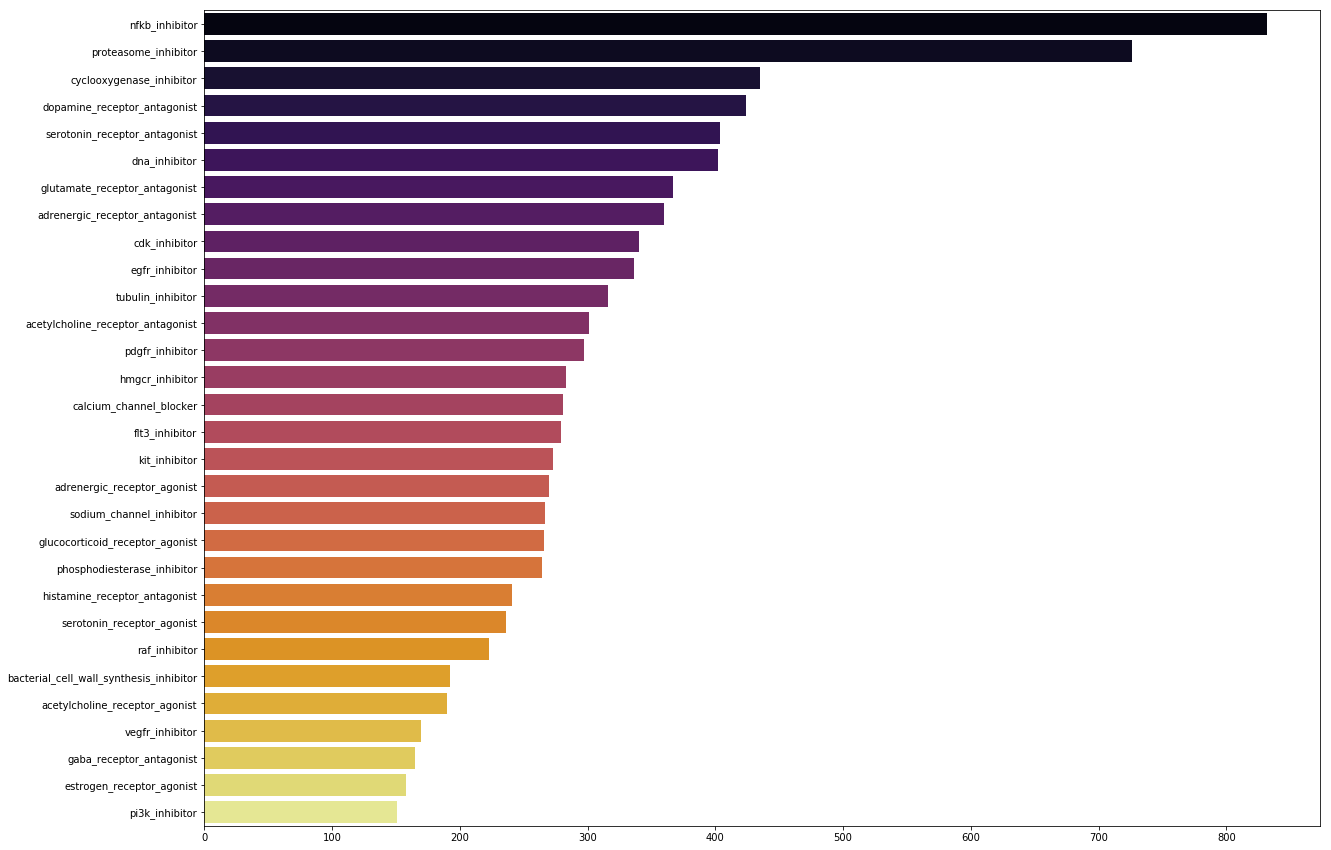

In [19]:
target_counts = train_target.iloc[:,1:].sum(axis=0)
fig = plt.figure(figsize=(20,15))
sns.barplot(y=target_counts.sort_values(ascending=False)[:30].index, 
            x=target_counts.sort_values(ascending=False)[:30].values, 
            palette='inferno')
plt.show()

No handles with labels found to put in legend.


0        1
1        0
2        3
3        0
4        1
        ..
23809    1
23810    1
23811    0
23812    1
23813    0
Length: 23814, dtype: int64


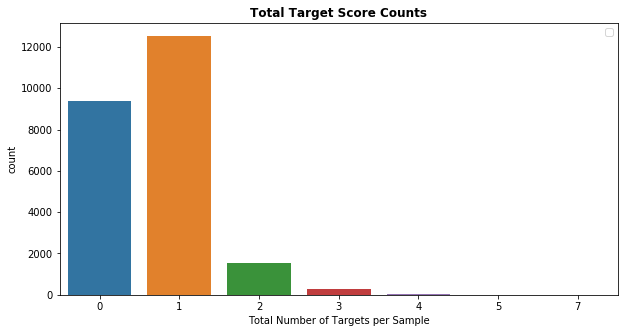

In [7]:
plt.figure(figsize=(10, 5))
features = train_target.columns.values[1:]
plt.title('Total Target Score Counts', weight='bold')
print(train_target[features].sum(axis=1))
sns.countplot(train_target[features].sum(axis=1))
plt.xlabel('Total Number of Targets per Sample')
plt.legend()
plt.show()

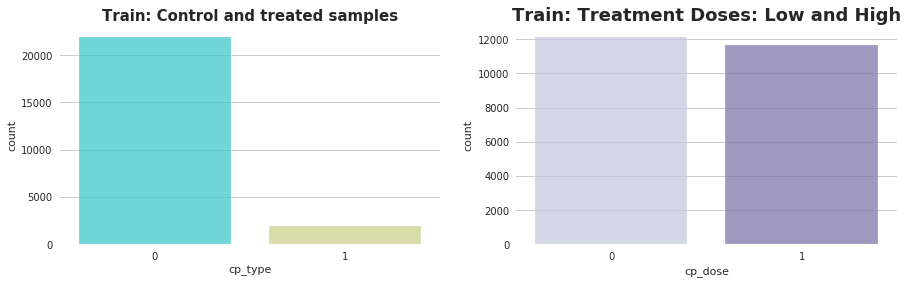

In [29]:
plt.style.use('seaborn')
sns.set_style('whitegrid')
fig = plt.figure(figsize=(15, 4))
#1 rows 2 cols
#first row, first col
ax1 = plt.subplot2grid((1,2),(0,0))
sns.countplot(x='cp_type', data=train_ft, palette='rainbow', alpha=0.75)
plt.title('Train: Control and treated samples', fontsize=15, weight='bold')
#first row sec col
ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(x='cp_dose', data=train_ft, palette='Purples', alpha=0.75)
plt.title('Train: Treatment Doses: Low and High',weight='bold', fontsize=18)
plt.show()

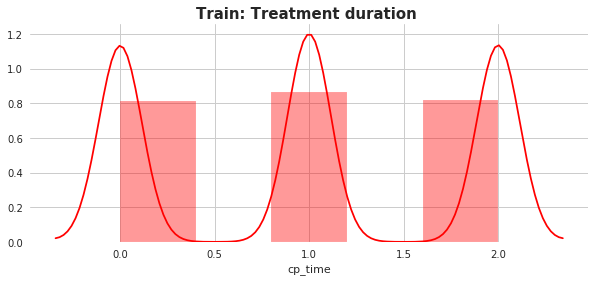

In [33]:
plt.figure(figsize=(10, 4))
sns.distplot( train_ft['cp_time'], color='red', bins=5)
plt.title("Train: Treatment duration ", fontsize=15, weight='bold')
plt.show()

[1 0 3 2 4 5 7]


/home/tasnima/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


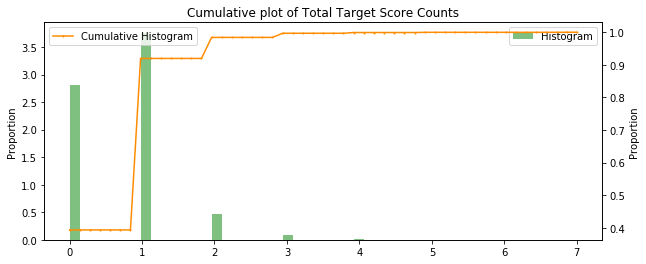

In [21]:
def hist(data, bins, title, labels, range = None):
    fig = plt.figure(figsize=(10, 4))
    ax = plt.axes()
    plt.ylabel("Proportion")
    values, base, _ = plt.hist(data, bins = bins, normed=True, alpha = 0.5, color = "green", range = range, 
                               label = "Histogram")
    ax_bis = ax.twinx()
    values = np.append(values,0)
    ax_bis.plot( base, np.cumsum(values)/ np.cumsum(values)[-1], color='darkorange', marker='o', linestyle='-',
                markersize = 1, label = "Cumulative Histogram" )
    plt.xlabel(labels)
    plt.ylabel("Proportion")
    plt.title(title)
    ax_bis.legend();
    ax.legend();
    plt.show()
    return

features = train_target.columns.values[1:]
data = train_target[features].sum(axis=1)
hist(data, 50, 'Cumulative plot of Total Target Score Counts', 'label')